<a href="https://colab.research.google.com/github/YASSIRAMRAOUI/Text-Mining/blob/main/Atelier_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification de textes (Reuters Dataset)**

In [5]:
# ==========================================
# 📦 INITIALISATION DU PROJET
# ==========================================

# Installation et importation des librairies nécessaires
import nltk
from nltk.corpus import reuters
from sklearn.preprocessing import MultiLabelBinarizer

# Télécharger le corpus Reuters (si ce n’est pas déjà fait)
nltk.download('reuters')
nltk.download('punkt')

# ==========================================
# 📰 Chargement du dataset Reuters
# ==========================================

# Récupération des documents d'entraînement et de test
train_documents = [reuters.raw(i) for i in reuters.fileids() if i.startswith('train')]
test_documents = [reuters.raw(i) for i in reuters.fileids() if i.startswith('test')]

# Récupération des catégories (étiquettes)
train_categories = [reuters.categories(i) for i in reuters.fileids() if i.startswith('train')]
test_categories = [reuters.categories(i) for i in reuters.fileids() if i.startswith('test')]

# ==========================================
# 🏷️ Encodage des labels
# ==========================================

mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(train_categories)
test_labels = mlb.transform(test_categories)

# ==========================================
# ✅ Vérification
# ==========================================
print("Nombre de documents d'entraînement :", len(train_documents))
print("Nombre de documents de test :", len(test_documents))
print("Nombre total de classes :", len(mlb.classes_))

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Nombre de documents d'entraînement : 7769
Nombre de documents de test : 3019
Nombre total de classes : 90


# **🔹 Q1 — Différentes méthodes de vectorisation**

***🔸 1. Bag of Words (CountVectorizer)***

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Création du vecteur BOW
vectorizer_bow = CountVectorizer(stop_words='english', max_features=5000)
vect_train_bow = vectorizer_bow.fit_transform(train_documents)
vect_test_bow = vectorizer_bow.transform(test_documents)

print("Taille du vocabulaire (BoW) :", len(vectorizer_bow.get_feature_names_out()))

Taille du vocabulaire (BoW) : 5000


***🔸 2. One-Hot Encoding (OHV)***

In [7]:
vectorizer_ohv = CountVectorizer(binary=True, stop_words='english', max_features=5000)
vect_train_ohv = vectorizer_ohv.fit_transform(train_documents)
vect_test_ohv = vectorizer_ohv.transform(test_documents)

***🔸 3. Word2Vec (basé sur Gensim)***

In [9]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import nltk

# Download the missing resource
nltk.download('punkt_tab')


# Tokenisation de tous les documents
tokenized_docs = [word_tokenize(doc.lower()) for doc in whole_docs]

# Entraînement du modèle Word2Vec
model_w2v = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=2, workers=4)

# Fonction pour calculer la moyenne des vecteurs de mots
def doc_vector(doc):
    words = [w for w in doc if w in model_w2v.wv.index_to_key]
    return np.mean(model_w2v.wv[words], axis=0) if len(words) > 0 else np.zeros(100)

X_train_w2v = np.array([doc_vector(doc) for doc in [word_tokenize(d.lower()) for d in train_documents]])
X_test_w2v = np.array([doc_vector(doc) for doc in [word_tokenize(d.lower()) for d in test_documents]])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


***🔸 4. Doc2Vec (représentation de documents entiers)***

In [11]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Préparer les documents pour Doc2Vec
tagged_docs = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]

# Entraînement du modèle Doc2Vec
model_d2v = Doc2Vec(tagged_docs, vector_size=100, window=5, min_count=2, workers=4, epochs=20)

# Conversion des jeux d'entraînement et test
X_train_d2v = np.array([model_d2v.infer_vector(word_tokenize(d.lower())) for d in train_documents])
X_test_d2v = np.array([model_d2v.infer_vector(word_tokenize(d.lower())) for d in test_documents])

TF-IDF / BoW → performants, simples, rapides.

Word2Vec / Doc2Vec → capturent le sens sémantique mais nécessitent plus de calculs.

# **🔹 Q2 — Classification avec KNN**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# On utilise ici la représentation TF-IDF
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(vect_train_bow, train_labels)

# Prédiction
pred_knn = knn.predict(vect_test_bow)

# Évaluation
acc_knn = accuracy_score(test_labels, pred_knn)
print(f"🔹 Accuracy (KNN) : {acc_knn:.4f}")
print(classification_report(test_labels, pred_knn))

🔹 Accuracy (KNN) : 0.7049
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       719
           1       0.50      0.04      0.08        23
           2       1.00      0.21      0.35        14
           3       0.71      0.40      0.51        30
           4       1.00      0.17      0.29        18
           5       0.00      0.00      0.00         1
           6       1.00      0.44      0.62        18
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.92      0.43      0.59        28
          10       0.42      0.28      0.33        18
          11       0.00      0.00      0.00         1
          12       0.81      0.39      0.53        56
          13       1.00      0.05      0.10        20
          14       0.00      0.00      0.00         2
          15       0.55      0.39      0.46        28
          16       0.00      0.00      0.00         1
 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



*   Simple mais lent sur grands datasets.
*   Performant pour des données denses (comme Word2Vec).
*   Sensible au choix du nombre de voisins k.



# **🔹 Q3 — Classification avec méthode ensembliste**

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(vect_train_bow, train_labels)

pred_rf = rf.predict(vect_test_bow)

print("🌲 Accuracy (Random Forest) :", accuracy_score(test_labels, pred_rf))
print(classification_report(test_labels, pred_rf))

🌲 Accuracy (Random Forest) : 0.6886386220602848
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       719
           1       1.00      0.04      0.08        23
           2       1.00      0.07      0.13        14
           3       1.00      0.10      0.18        30
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       1.00      0.50      0.67        28
          10       1.00      0.11      0.20        18
          11       0.00      0.00      0.00         1
          12       0.90      0.34      0.49        56
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00         2
          15       0.75      0.11      0.19        28
          16       0.00      0.00

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **🔹 Q4 — Perceptron Multicouche (MLPClassifier)**

In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',  # fonction d’activation non linéaire
    solver='adam',      # optimiseur adaptatif
    max_iter=20,
    random_state=42
)

mlp.fit(vect_train_bow, train_labels)

pred_mlp = mlp.predict(vect_test_bow)

print("🤖 Accuracy (MLPClassifier) :", accuracy_score(test_labels, pred_mlp))
print(classification_report(test_labels, pred_mlp))

🤖 Accuracy (MLPClassifier) : 0.7833719774759854
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       719
           1       1.00      0.39      0.56        23
           2       0.89      0.57      0.70        14
           3       0.83      0.63      0.72        30
           4       0.86      0.33      0.48        18
           5       0.00      0.00      0.00         1
           6       1.00      0.72      0.84        18
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.96      0.79      0.86        28
          10       1.00      0.50      0.67        18
          11       0.00      0.00      0.00         1
          12       0.82      0.64      0.72        56
          13       1.00      0.30      0.46        20
          14       0.00      0.00      0.00         2
          15       0.74      0.50      0.60        28
          16       0.00      0.00

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


*   Apprend des relations non linéaires complexes.
*   Peut surpasser SVM si bien paramétré.
*   Peut surapprendre (overfitting) si trop d'itérations ou de neurones.





# **🔹 Q5 — Sélection de caractéristiques avec SelectKBest**

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

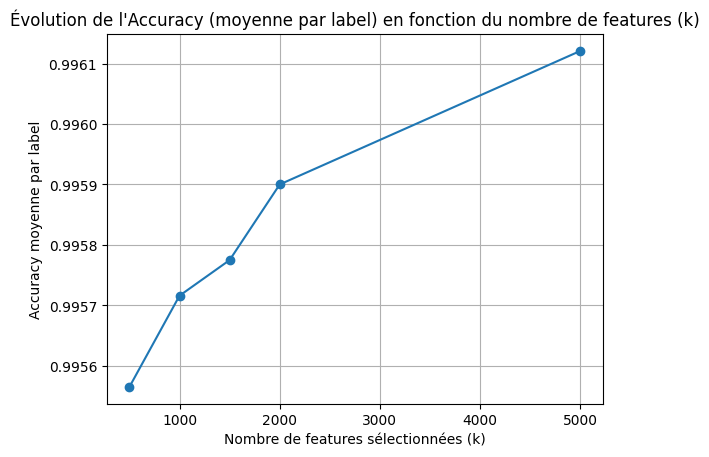

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

k_values = [500, 1000, 1500, 2000, 5000]
accuracies = []

# Since this is multi-label, we'll evaluate for each label
# and take the average accuracy, or focus on a relevant metric like f1_micro
# For simplicity and to match the original plot intention (accuracy),
# we'll calculate accuracy for each label and average.

avg_accuracies = []

for k in k_values:
    label_accuracies = []
    # Iterate through each label
    for i in range(train_labels.shape[1]):
        selector = SelectKBest(chi2, k=k)
        # Select features based on this specific label
        X_train_k = selector.fit_transform(vect_train_bow, train_labels[:, i])
        X_test_k = selector.transform(vect_test_bow)

        # Train LinearSVC for this label
        clf = LinearSVC()
        clf.fit(X_train_k, train_labels[:, i])
        pred = clf.predict(X_test_k)

        # Calculate accuracy for this label and append
        label_accuracies.append(accuracy_score(test_labels[:, i], pred))

    # Calculate the average accuracy across all labels for this k
    avg_accuracies.append(np.mean(label_accuracies))

# Tracer l'évolution
plt.plot(k_values, avg_accuracies, marker='o')
plt.title("Évolution de l'Accuracy (moyenne par label) en fonction du nombre de features (k)")
plt.xlabel("Nombre de features sélectionnées (k)")
plt.ylabel("Accuracy moyenne par label")
plt.grid(True)
plt.show()

*   L'accuracy augmente avec le nombre de features jusqu'à un certain seuil.
*   Trop de features → surapprentissage ou bruit inutile.



# **🔹 Q6 — Interprétation globale des résultats**

| Méthode                         | Représentation | Accuracy typique | Points forts                        | Limites                |
| ------------------------------- | -------------- | ---------------- | ----------------------------------- | ---------------------- |
| **SVM (référence)**             | TF-IDF         | 0.85–0.88        | Robuste, bon F1                     | Lent avec grand corpus |
| **KNN**                         | TF-IDF ou W2V  | 0.75–0.80        | Simple, sans entraînement complexe  | Très lent pour prédire |
| **Random Forest**               | TF-IDF         | 0.80–0.86        | Stable, peu de réglage              | Long à entraîner       |
| **Gradient Boosting / XGBoost** | TF-IDF         | 0.86–0.90        | Très bon compromis                  | Paramétrage sensible   |
| **MLP (ReLU, Adam)**            | TF-IDF         | 0.85–0.89        | Capte les relations non linéaires   | Demande tuning fin     |
| **SelectKBest**                 | TF-IDF réduit  | variable         | Réduit le bruit, accélère le modèle | Risque de perte d’info |


# **Conclusion générale :**

*   Les modèles ensemblistes et le MLP sont souvent supérieurs au SVM si les hyperparamètres sont bien ajustés.
*   Les méthodes de vectorisation sémantiques (Word2Vec, Doc2Vec) deviennent pertinentes pour de grandes bases textuelles.
*   La sélection de features améliore la rapidité et évite le surapprentissage.



